<a href="https://colab.research.google.com/github/zia207/Python_for_Beginners/blob/main/Notebook/01_01_05_pandas_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# Pandas for Beginners

Pandas is a powerful Python library for data manipulation and analysis. This tutorial introduces beginners to Pandas, covering the basics of creating, manipulating, and analyzing data using DataFrames and Series, as well as advanced features like merging, reshaping, time-series analysis, multi-indexing, handling large datasets, and visualization. All examples are simple and include explanations.

![alt text](http://drive.google.com/uc?export=view&id=1cVOaeig7WVBVOYpYgwVJoxUUooDsaaOR)

## Prerequisites
- Basic Python knowledge (lists, dictionaries, etc.)
- Python and Pandas installed (`pip install pandas`)
- NumPy installed for some advanced features (`pip install numpy`)
- Matplotlib and Seaborn for visualization (`pip install matplotlib seaborn`)

## Importing Pandas
To use Pandas, import it with the common alias `pd`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Pandas Data Structures
Pandas has two primary data structures:
- **Series**: A one-dimensional array-like object, similar to a list or a column in a table.
- **DataFrame**: A two-dimensional table with rows and columns, like a spreadsheet.

### Creating a Series
A Series can be created from a list, dictionary, or array.

In [ ]:
# Creating a Series from a list
data = [10, 20, 30, 40]
series = pd.Series(data, index=['a', 'b', 'c', 'd'])
print(series)

a    10
b    20
c    30
d    40
dtype: int64


**Output**:
```
a    10
b    20
c    30
d    40
dtype: int64
```

The `index` parameter assigns labels to each value. If omitted, Pandas assigns default numeric indices (0, 1, 2, ...).

### Creating a DataFrame
A DataFrame can be created from a dictionary, list of dictionaries, or other data structures.

In [ ]:
# Creating a DataFrame from a dictionary
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}
df = pd.DataFrame(data)
print(df)

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


**Output**:
```
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
```

Each key in the dictionary becomes a column, and the values form the rows.

## 3. Viewing Data
Pandas provides methods to inspect DataFrames.

- **View first few rows**: `df.head(n)` (default n=5)
- **View last few rows**: `df.tail(n)`
- **Get basic info**: `df.info()`
- **Summary statistics**: `df.describe()`

In [ ]:
# Viewing the first 2 rows
print(df.head(2))
# Get DataFrame info
print(df.info())

    Name  Age         City
0  Alice   25     New York
1    Bob   30  Los Angeles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   City    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes
None


## Selecting Data
You can select specific rows, columns, or values using indexing.

### Selecting Columns
Access columns using their names.

In [ ]:
# Select a single column (returns a Series)
print(df['Name'])
# Select multiple columns (returns a DataFrame)
print(df[['Name', 'City']])

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object
      Name         City
0    Alice     New York
1      Bob  Los Angeles
2  Charlie      Chicago


### Selecting Rows
Use `loc` (label-based) or `iloc` (integer-based) to select rows.

In [ ]:
# Select row by index label
print(df.loc[0])
# Select row by integer position
print(df.iloc[1])

Name       Alice
Age           25
City    New York
Name: 0, dtype: object
Name            Bob
Age              30
City    Los Angeles
Name: 1, dtype: object


## Filtering Data
Filter rows based on conditions.

In [ ]:
# Filter rows where Age > 30
print(df[df['Age'] > 30])

      Name  Age     City
2  Charlie   35  Chicago


You can combine conditions using `&` (and) or `|` (or).

In [ ]:
# Filter rows where Age > 25 and City is Chicago
print(df[(df['Age'] > 25) & (df['City'] == 'Chicago')])

      Name  Age     City
2  Charlie   35  Chicago


## Adding and Modifying Data
You can add new columns or modify existing ones.

### Adding a Column

In [ ]:
# Add a new column
df['Salary'] = [50000, 60000, 75000]
print(df)

      Name  Age         City  Salary
0    Alice   25     New York   50000
1      Bob   30  Los Angeles   60000
2  Charlie   35      Chicago   75000


### Modifying Data
Update values using `loc` or conditions.

In [ ]:
# Update a specific value
df.loc[0, 'Age'] = 26
# Increase all salaries by 10%
df['Salary'] = df['Salary'] * 1.1
print(df)

      Name  Age         City   Salary
0    Alice   26     New York  55000.0
1      Bob   30  Los Angeles  66000.0
2  Charlie   35      Chicago  82500.0


## Handling Missing Data
Pandas provides methods to handle missing values (`NaN`).

In [ ]:
# Introduce a missing value
df.loc[1, 'City'] = None
print(df)
# Fill missing values with a default
df['City'] = df['City'].fillna('Unknown')
print(df)

      Name  Age      City   Salary
0    Alice   26  New York  55000.0
1      Bob   30      None  66000.0
2  Charlie   35   Chicago  82500.0
      Name  Age      City   Salary
0    Alice   26  New York  55000.0
1      Bob   30   Unknown  66000.0
2  Charlie   35   Chicago  82500.0


## Grouping and Aggregating
Group data by a column and compute aggregates (e.g., mean, sum).

In [ ]:
# Group by City and calculate average Salary
print(df.groupby('City')['Salary'].mean())

City
Chicago     82500.0
New York    55000.0
Unknown     66000.0
Name: Salary, dtype: float64


## aving and Loading Data
Pandas supports reading and writing data in various formats (CSV, Excel, JSON, etc.).

### Saving to CSV

In [ ]:
df.to_csv('output.csv', index=False)

### Loading from CSV

In [ ]:
df_from_csv = pd.read_csv('output.csv')
print(df_from_csv)

      Name  Age      City   Salary
0    Alice   26  New York  55000.0
1      Bob   30   Unknown  66000.0
2  Charlie   35   Chicago  82500.0


## Advanced Pandas Features
Here are some advanced Pandas features to take your data analysis further.

### Merging DataFrames
Pandas allows combining multiple DataFrames using `merge` or `concat`.

#### Merging DataFrames
Create a second DataFrame with additional information and merge it with the original.

In [ ]:
# Create a second DataFrame
data2 = {
    'Name': ['Alice', 'Bob', 'David'],
    'Department': ['HR', 'IT', 'Marketing']
}
df2 = pd.DataFrame(data2)

# Merge on 'Name' (inner join)
merged_df = pd.merge(df, df2, on='Name', how='inner')
print(merged_df)

    Name  Age      City   Salary  Year Salary_Category Department
0  Alice   26  New York  55000.0  2023             Low         HR
1    Bob   30   Unknown  66000.0  2023             Low         IT


The `how` parameter can be `'inner'`, `'left'`, `'right'`, or `'outer'` to control which rows are kept.

#### Concatenating DataFrames
Use `concat` to stack DataFrames vertically or horizontally.

In [ ]:
# Concatenate vertically
df3 = pd.DataFrame({
    'Name': ['David'],
    'Age': [40],
    'City': ['Boston'],
    'Salary': [70000.0]
})
concat_df = pd.concat([df, df3], ignore_index=True)
print(concat_df)

      Name  Age      City   Salary    Year Salary_Category
0    Alice   26  New York  55000.0  2023.0             Low
1      Bob   30   Unknown  66000.0  2023.0             Low
2  Charlie   35   Chicago  82500.0  2024.0            High
3    David   40    Boston  70000.0     NaN             NaN


### Reshaping Data
Pandas provides tools like `pivot`, `melt`, and `stack` to reshape data.

#### Pivot Table
Create a pivot table to summarize data.

In [ ]:
# Add a 'Year' column for demonstration
df['Year'] = [2023, 2023, 2024]
pivot_table = df.pivot_table(values='Salary', index='City', columns='Year', aggfunc='mean')
print(pivot_table)

Year         2023     2024
City                      
Chicago       NaN  82500.0
New York  55000.0      NaN
Unknown   66000.0      NaN


#### Melting Data
Convert wide-format data to long-format using `melt`.

In [ ]:
# Melt the DataFrame
melted_df = pd.melt(df, id_vars=['Name'], value_vars=['Age', 'Salary'], var_name='Metric', value_name='Value')
print(melted_df)

      Name  Metric    Value
0    Alice     Age     26.0
1      Bob     Age     30.0
2  Charlie     Age     35.0
3    Alice  Salary  55000.0
4      Bob  Salary  66000.0
5  Charlie  Salary  82500.0


### Time-Series Data
Pandas excels at handling time-series data.

#### Working with Dates
Convert a column to datetime and perform time-based operations.

In [ ]:
# Create a DataFrame with dates
df_time = pd.DataFrame({
    'Date': ['2023-01-01', '2023-02-01', '2023-03-01'],
    'Sales': [100, 150, 200]
})
df_time['Date'] = pd.to_datetime(df_time['Date'])

# Set Date as index
df_time.set_index('Date', inplace=True)

# Resample to monthly frequency and compute mean
monthly_sales = df_time.resample('ME').mean()
print(monthly_sales)

            Sales
Date             
2023-01-31  100.0
2023-02-28  150.0
2023-03-31  200.0


#### Rolling Windows
Calculate rolling statistics, like a moving average.

In [ ]:
# Calculate 2-period rolling mean
df_time['Rolling_Mean'] = df_time['Sales'].rolling(window=2).mean()
print(df_time)

            Sales  Rolling_Mean
Date                           
2023-01-01    100           NaN
2023-02-01    150         125.0
2023-03-01    200         175.0


###  Applying Custom Functions
Use `apply` or `map` to apply custom functions to DataFrames or Series.

In [ ]:
# Define a custom function
def categorize_salary(salary):
    return 'High' if salary > 70000 else 'Low'

# Apply to Salary column
df['Salary_Category'] = df['Salary'].apply(categorize_salary)
print(df)

      Name  Age      City   Salary  Year Salary_Category
0    Alice   26  New York  55000.0  2023             Low
1      Bob   30   Unknown  66000.0  2023             Low
2  Charlie   35   Chicago  82500.0  2024            High


### Multi-Indexing
Multi-indexing allows hierarchical indexing for more complex data organization.

#### Creating a Multi-Index DataFrame
Set multiple columns as the index to create a multi-level index.

In [ ]:
# Set multi-index using City and Year
df_multi = df.set_index(['City', 'Year'])
print(df_multi)

                  Name  Age   Salary Salary_Category
City     Year                                       
New York 2023    Alice   26  55000.0             Low
Unknown  2023      Bob   30  66000.0             Low
Chicago  2024  Charlie   35  82500.0            High


#### Selecting with Multi-Index
Access data using multi-level indices with `loc`.

In [ ]:
# Select data for New York in 2023
print(df_multi.loc[('New York', 2023)])

Name                 Alice
Age                     26
Salary             55000.0
Salary_Category        Low
Name: (New York, 2023), dtype: object


#### Aggregating with Multi-Index
Group and aggregate with multi-level indices.

In [ ]:
# Group by City and Year, calculate average Salary
print(df_multi.groupby(level=['City', 'Year'])['Salary'].mean())

City      Year
Chicago   2024    82500.0
New York  2023    55000.0
Unknown   2023    66000.0
Name: Salary, dtype: float64


### Handling Large Datasets with Chunking
For large datasets, Pandas can process data in chunks to manage memory usage.

#### Reading in Chunks
Use `chunksize` with `read_csv` to process large files incrementally.

In [ ]:
# Example: Reading a large CSV file in chunks
# Assume 'large_data.csv' exists
chunk_size = 2
for chunk in pd.read_csv('output.csv', chunksize=chunk_size):
    # Process each chunk (e.g., filter or aggregate)
    print(chunk.groupby('City')['Salary'].mean())

City
New York    55000.0
Unknown     66000.0
Name: Salary, dtype: float64
City
Chicago    82500.0
Name: Salary, dtype: float64


This approach is useful for files too large to fit in memory. You can perform operations (e.g., filtering, aggregating) on each chunk and combine results if needed.

###  Visualization with Matplotlib and Seaborn
Pandas integrates seamlessly with Matplotlib and Seaborn for data visualization.

#### Matplotlib: Bar Plot
Create a bar plot of average salaries by city.

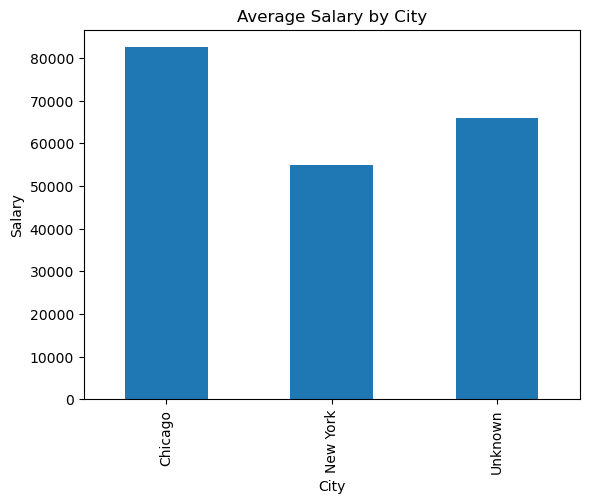

In [ ]:
# Plot average salary by city
avg_salary = df.groupby('City')['Salary'].mean()
avg_salary.plot(kind='bar', title='Average Salary by City')
plt.xlabel('City')
plt.ylabel('Salary')
plt.show()

**Output**: A bar plot showing average salaries for each city.

#### Seaborn: Box Plot
Use Seaborn for a box plot to visualize salary distribution by salary category.

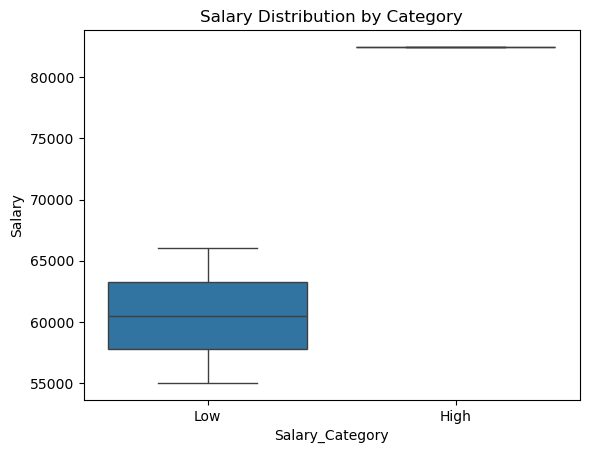

In [ ]:
# Box plot of salaries by Salary_Category
sns.boxplot(x='Salary_Category', y='Salary', data=df)
plt.title('Salary Distribution by Category')
plt.show()

**Output**: A box plot comparing salaries in 'High' and 'Low' categories.

## Summary and Conclusion
This tutorial covers the essentials of Pandas for beginners, from creating and manipulating DataFrames and Series to advanced features like merging, reshaping, time-series analysis, multi-indexing, chunking for large datasets, and visualization with Matplotlib and Seaborn. Pandas is a versatile tool for data analysis, enabling efficient handling of structured data, complex indexing, and integration with visualization libraries. By mastering these concepts, you can perform sophisticated data manipulations and create insightful visualizations. Practice with real-world datasets to solidify your skills and explore Pandas' full potential.

## Resources
- **Official Pandas Documentation**: https://pandas.pydata.org/docs/
- **Matplotlib Documentation**: https://matplotlib.org/stable/contents.html
- **Seaborn Documentation**: https://seaborn.pydata.org/
- **Kaggle Datasets**: https://www.kaggle.com/datasets (for practice datasets)
- **Pandas Cheat Sheet**: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- **Python Data Science Handbook** by Jake VanderPlas (book or online resource for deeper learning)